<a href="https://colab.research.google.com/github/AkshatSG/DyslexOpt-V1/blob/main/DyslexOptV1_Optuna_BO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install optuna

In [ ]:
import optuna

def objective(trial):
    #Can choose any text/screen config parameters and specify their ranges
    font_size = trial.suggest_float('font_size', 8, 25)
    line_spacing = trial.suggest_float('line_spacing', 1, 3)
    width = trial.suggest_float('width', 7, 20)
    opacity = trial.suggest_float('opacity', 1, 9)

    print(f"Font Size: {font_size:.2f}, Line Spacing: {line_spacing:.2f}, Width: {width:.2f}, Opacity: {opacity:.2f}")

    # For this, enter the objective function value that is printed after reading each text in the reading_test.py file
    accuracy = float(input("Enter the accuracy for the above settings: "))

    return accuracy

study = optuna.create_study(direction='maximize')

# For the sake of preventing strain, 15 iterations were chosen; you can choose any number of iterations comfortable with the dyslexic reader
study.optimize(objective, n_trials=15)

# Get the best parameters
best_params = study.best_params
best_value = study.best_value

print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_value:.2f}")

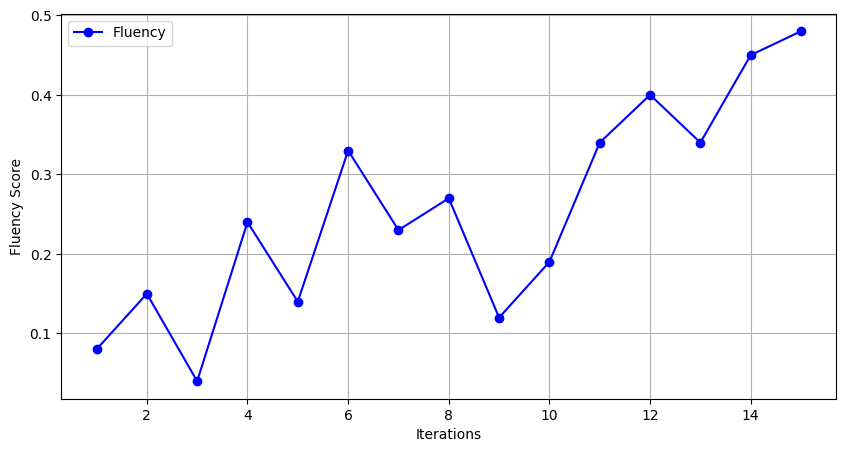

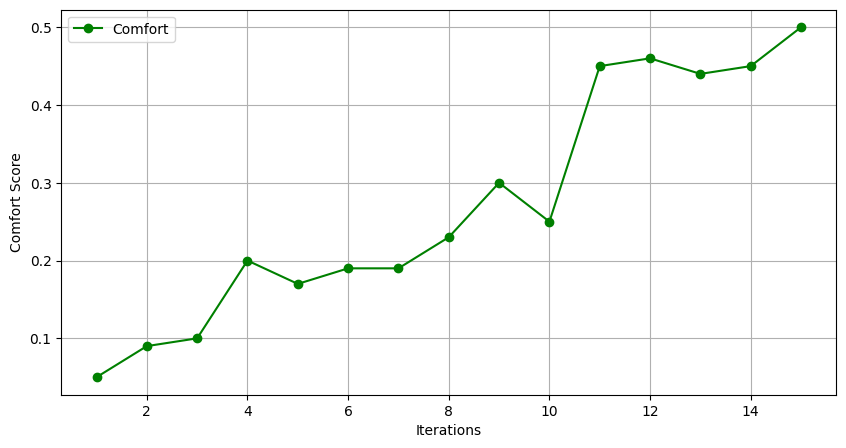

In [ ]:
import matplotlib.pyplot as plt

# Data that you can retrieve at the end of all tests from the final statistics output the reading_test.py file
# The following is data collected from the reading_test.py file for one of the readers
episodes = list(range(1, 16))
fluency_scores = [0.08, 0.15, 0.04, 0.24, 0.14, 0.33, 0.23, 0.27, 0.12, 0.19, 0.34, 0.40, 0.34, 0.45, 0.48]
comfort_scores = [0.05, 0.09, 0.10, 0.20, 0.17, 0.19, 0.19, 0.23, 0.3, 0.25, 0.45, 0.46, 0.44, 0.45, 0.50]

# Plotting fluency scores
plt.figure(figsize=(10, 5))
plt.plot(episodes, fluency_scores, marker='o', linestyle='-', color='b', label='Fluency')
plt.xlabel('Iterations')
plt.ylabel('Fluency Score')
plt.title('Fluency Scores over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Plotting comfort scores
plt.figure(figsize=(10, 5))
plt.plot(episodes, comfort_scores, marker='o', linestyle='-', color='g', label='Comfort')
plt.xlabel('Iterations')
plt.ylabel('Comfort Score')
plt.legend()
plt.grid(True)
plt.show()
